In [1]:
from sklearn import datasets
import numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [2]:
# visualize the dataset
def plot_dataset_and_classifier(X, y, w, w0):

    plt.figure(figsize=(20, 7))

    sns.despine()
    sns.set_style('white')
    sns.set_context('paper')

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, legend=False)

    x_axis = np.arange(int(X[:, 0].min()) - 5, int(X[:, 0].max()) + 5)
    y_axis = -1 * (w[0] * x_axis + w0) / w[1]

    sns.lineplot(x=x_axis, y=y_axis)

    plt.title(f'The DataSet and The Classifier', **{'fontname': 'monospace'})

    plt.xticks(**{'fontname': 'monospace'})
    plt.yticks(**{'fontname': 'monospace'})

    plt.xlim([X[:, 0].min() - 5, X[:, 0].max() + 5])
    plt.ylim([X[:, 1].min() - 5, X[:, 1].max() + 5])

    plt.show()

    return None

# visualize the dataset
def plot_lineplot(xs, ys, title):

    plt.figure(figsize=(20, 7))

    sns.despine()
    sns.set_style('white')
    sns.set_context('paper')

    sns.lineplot(x=xs, y=ys)

    plt.title(f'{title}', **{'fontname': 'monospace'})

    plt.xticks(**{'fontname': 'monospace'})
    plt.yticks(**{'fontname': 'monospace'})

    plt.show()

    return None

# hypothesis - sigmoid function
compute_z = lambda w, w0, xi : np.dot(w.T, xi) + w0

# compute predicted label - yi_hat
predict_probability = lambda z : 1 / (1 + np.exp(-z))
predict_label = lambda yi_hat_probability : 0 if yi_hat_probability < 0.5 else 1

# log-loss function
compute_loss = lambda yi, yi_hat : (yi * np.log(yi_hat)) + ((1 - yi) * np.log(1 - yi_hat))

# compute partial gradients w.r.t. all the weights
def compute_gradient(xi, yi, yi_hat_probability): 
    gw0 = 1 * (yi_hat_probability - yi)
    gw1 = xi[0] * (yi_hat_probability - yi)
    gw2 = xi[1] * (yi_hat_probability - yi)
    return gw0, gw1, gw2

# bind it all together and implement logistic regression
def logistic_regression(X, y, w, w0, num_epochs=1000, learning_rate=0.5, plateau_counter_limit=20, accuracy_delta=0.1):

    accuracy_history, loss_history, grad_w0_history, grad_w1_history, grad_w2_history = [], [], [], [], []
    plateau_counter = 0

    for epoch in range(num_epochs):

        total_loss, missclassified_points, grad_w0, grad_w1, grad_w2, y_hat_list = 0, 0, 0, 0, 0, []

        for xi, yi in zip(X, y):

            # compute hypothesis value and from it the label probability            
            z = compute_z(w, w0, xi)
            yi_hat_probability = predict_probability(z)
            
            # converting yi_hat_probability to label and appending to the list of predictions to return
            y_hat_list.append(predict_label(yi_hat_probability))
            if y_hat_list[-1] != yi:
                missclassified_points += 1
            
            # log-loss function
            total_loss += compute_loss(yi, yi_hat_probability)

            # computing gradients
            gw0, gw1, gw2 = compute_gradient(xi, yi, yi_hat_probability)
            grad_w0 += gw0
            grad_w1 += gw1
            grad_w2 += gw2
        
        grad_w0_history.append(grad_w0)
        grad_w1_history.append(grad_w1)
        grad_w2_history.append(grad_w2)

        # average total loss
        total_loss *= -1 / X.shape[0]
        loss_history.append(total_loss)

        epoch_accuracy = round(100 * (1 - (missclassified_points / X.shape[0])), 3)
        accuracy_history.append(epoch_accuracy)

        # updating weights using the computed gradient values
        w0 -= learning_rate * grad_w0 / (2 * X.shape[0])
        w[0] -= learning_rate * grad_w1 / (2 * X.shape[0])
        w[1] -= learning_rate * grad_w2 / (2 * X.shape[0])

        if epoch % 25 == 0:
            print(f'Epoch: {epoch + 1}, Accuracy: {epoch_accuracy}%, Loss: {total_loss}, w: {w}, w0: {w0}')

        # checking the number of missclassified points, if 0 - stop any further training iteration
        if missclassified_points == 0:
                print(f'Epoch: {epoch + 1}, Accuracy: {epoch_accuracy}%, Loss: {total_loss}, w: {w}, w0: {w0}')
                print(f'Training Complete. 100% accuracy achieved in {epoch + 1} epochs.')
                return w, w0, y_hat_list, accuracy_history, loss_history, grad_w0_history, grad_w1_history, grad_w2_history

        # checking improvement in accuracy over past epochs. if no significant change observe, terminating the process
        if epoch > 2 and abs(epoch_accuracy - accuracy_history[-2]) <= accuracy_delta:
            plateau_counter += 1
            if plateau_counter >= plateau_counter_limit:
                print(f'Epoch: {epoch + 1}, Accuracy: {epoch_accuracy}%, Loss: {total_loss}, w: {w}, w0: {w0}')
                print(f'Interupting training as no significant improvement noticed in accuracy over last {plateau_counter_limit} epochs.')
                return w, w0, y_hat_list, accuracy_history, loss_history, grad_w0_history, grad_w1_history, grad_w2_history

    print(f'Epoch: {epoch + 1}, Accuracy: {epoch_accuracy}%, Loss: {total_loss}, w: {w}, w0: {w0}')
    return w, w0, y_hat_list, accuracy_history, loss_history, grad_w0_history, grad_w1_history, grad_w2_history

w: [1.90829476 1.90910627]	w0: -0.720101593762375


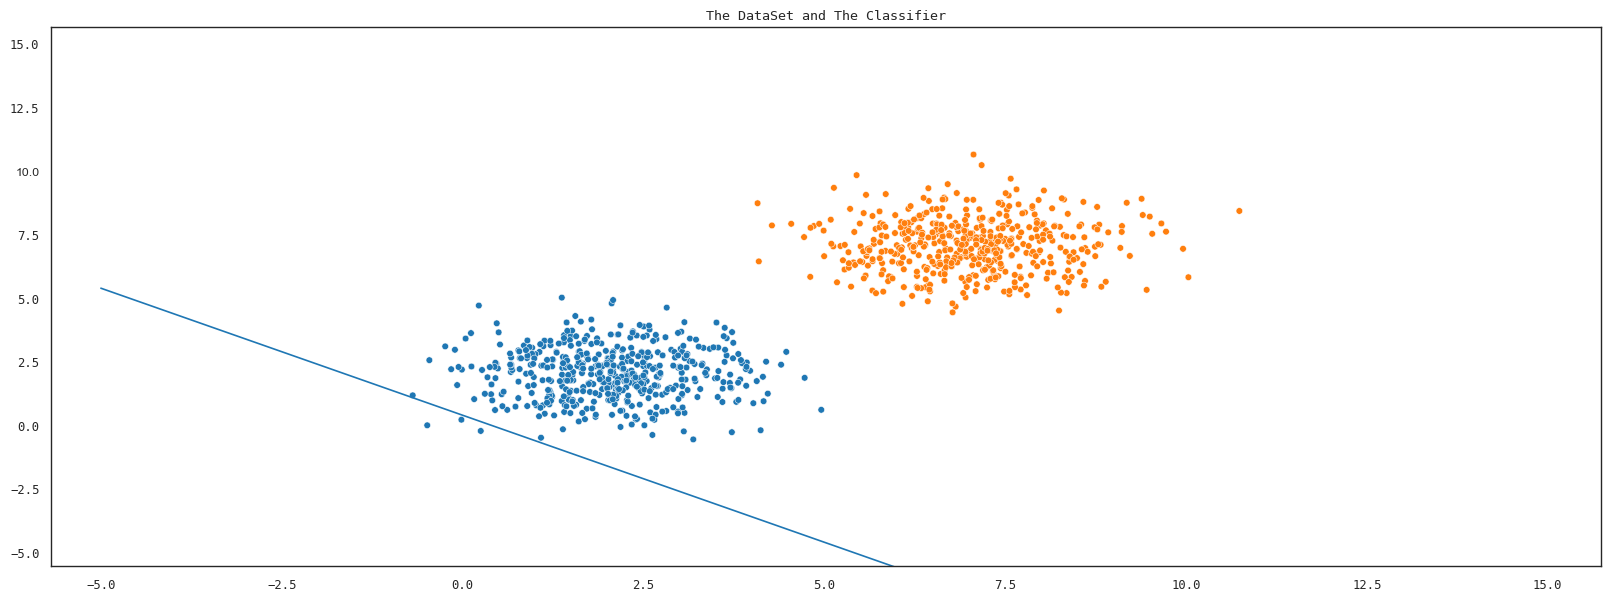

Epoch: 1, Accuracy: 50.3%, Loss: 3.5465813679795817, w: [1.65232084 1.65682362], w0: -0.8432732950637201
Epoch: 26, Accuracy: 98.9%, Loss: 0.2523827768433607, w: [0.28403864 0.31970834], w0: -2.0463363395256398
Epoch: 51, Accuracy: 99.6%, Loss: 0.19714848247028355, w: [0.34006497 0.380584  ], w0: -2.6223215423329784
Epoch: 76, Accuracy: 99.9%, Loss: 0.1616491636113215, w: [0.38773769 0.42804425], w0: -3.084887044581363
Epoch: 77, Accuracy: 100.0%, Loss: 0.16049591983236847, w: [0.38948691 0.42974916], w0: -3.101596586541095
Training Complete. 100% accuracy achieved in 77 epochs.

w_optimal: [0.38948691 0.42974916]	w0_optimal: -3.101596586541095


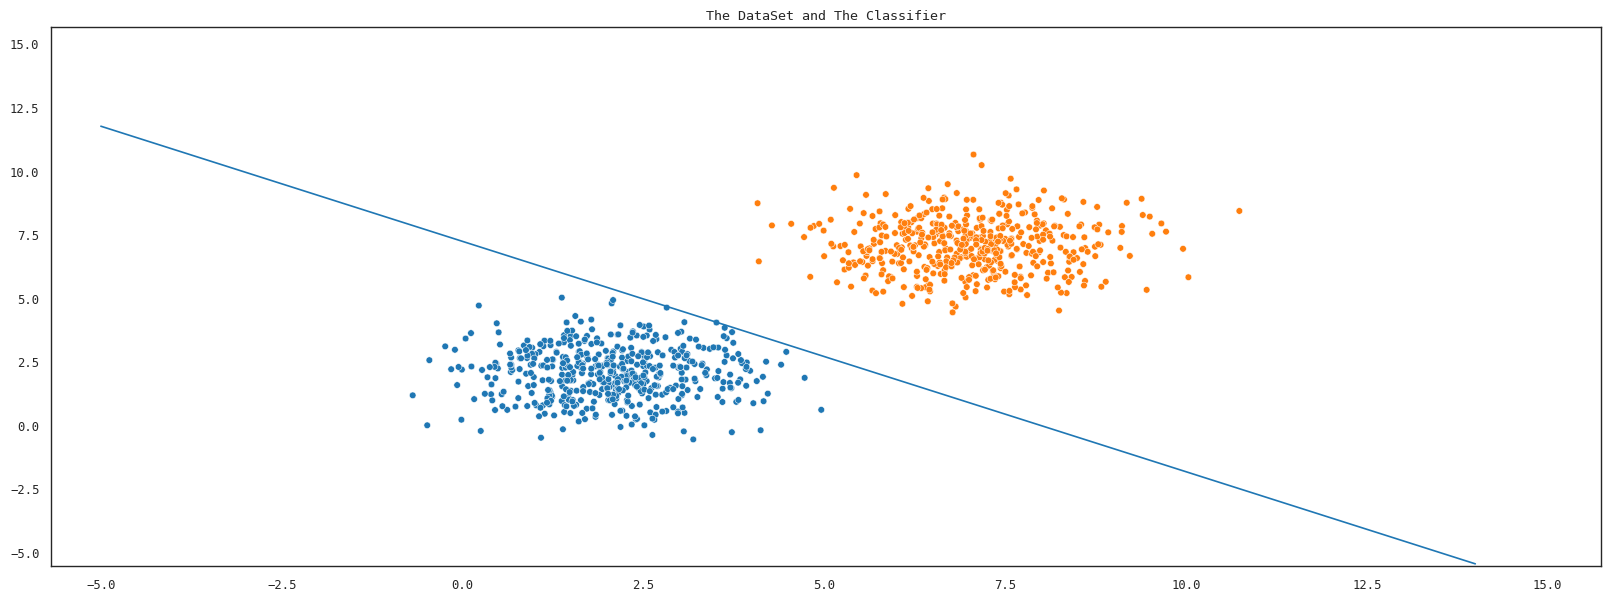

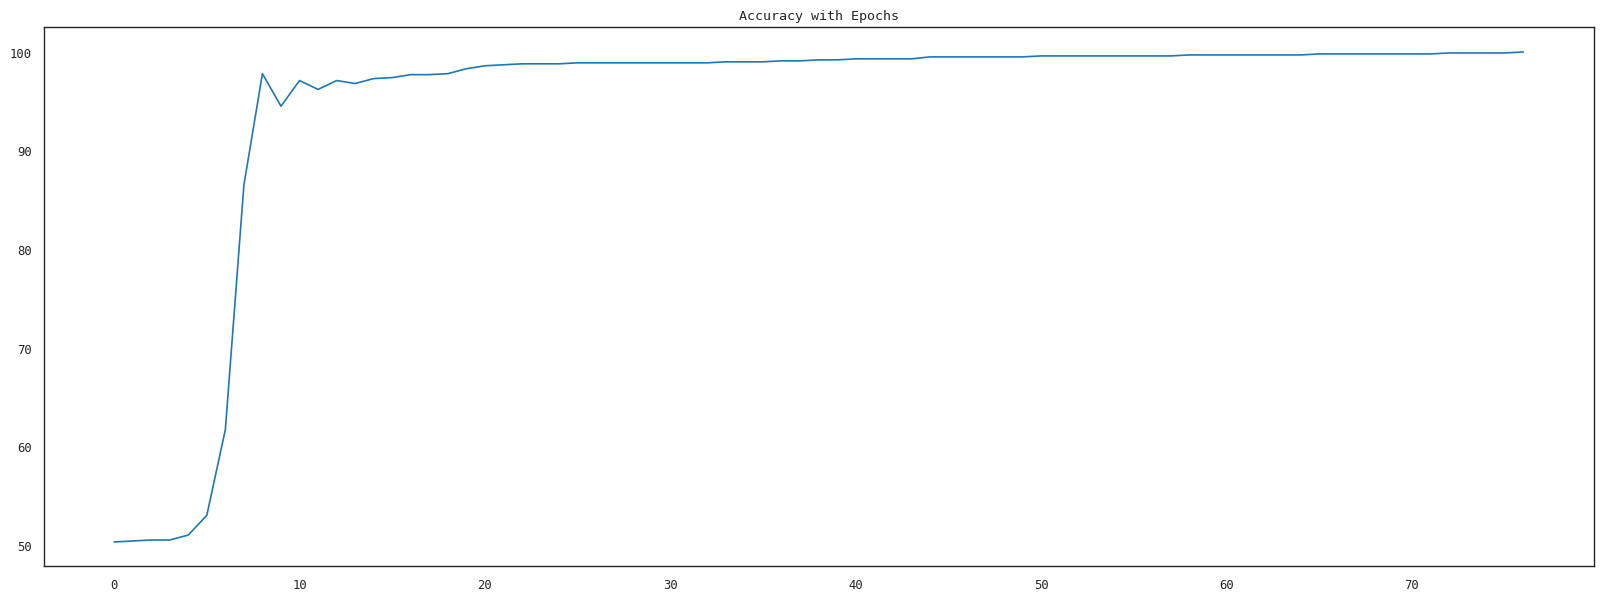

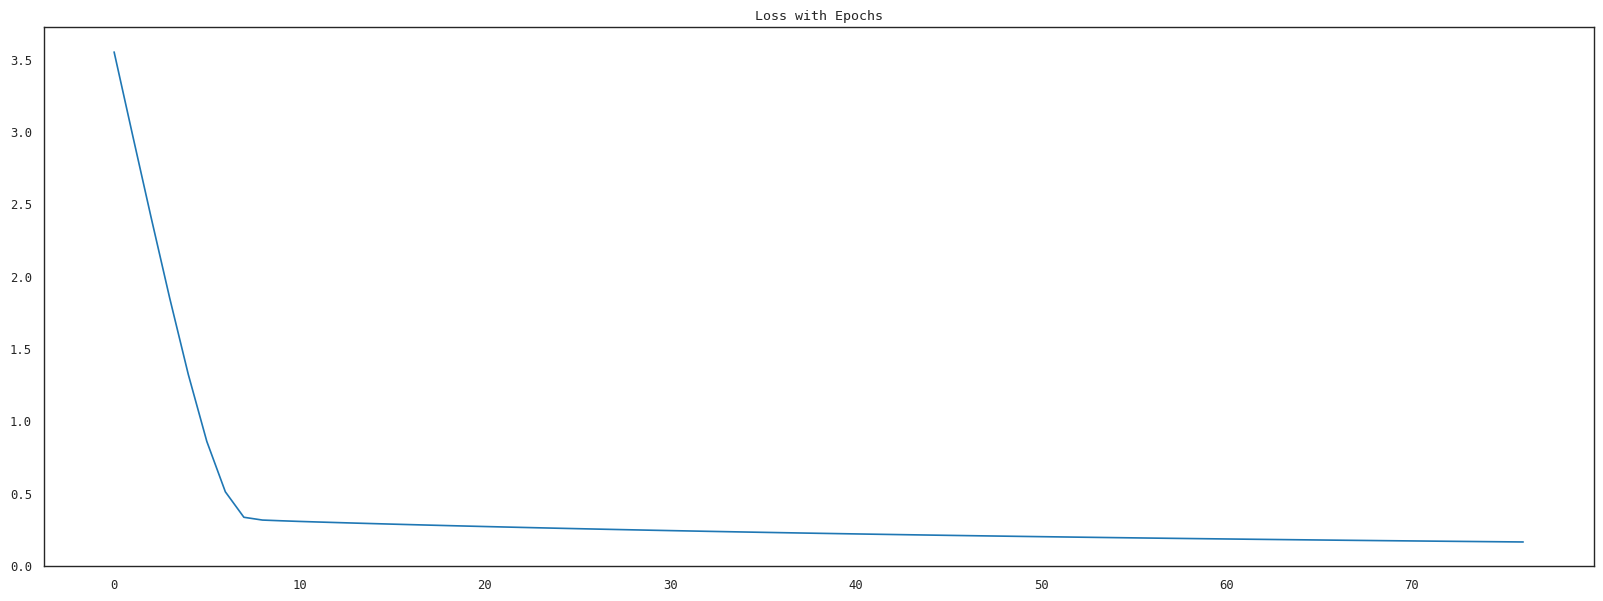

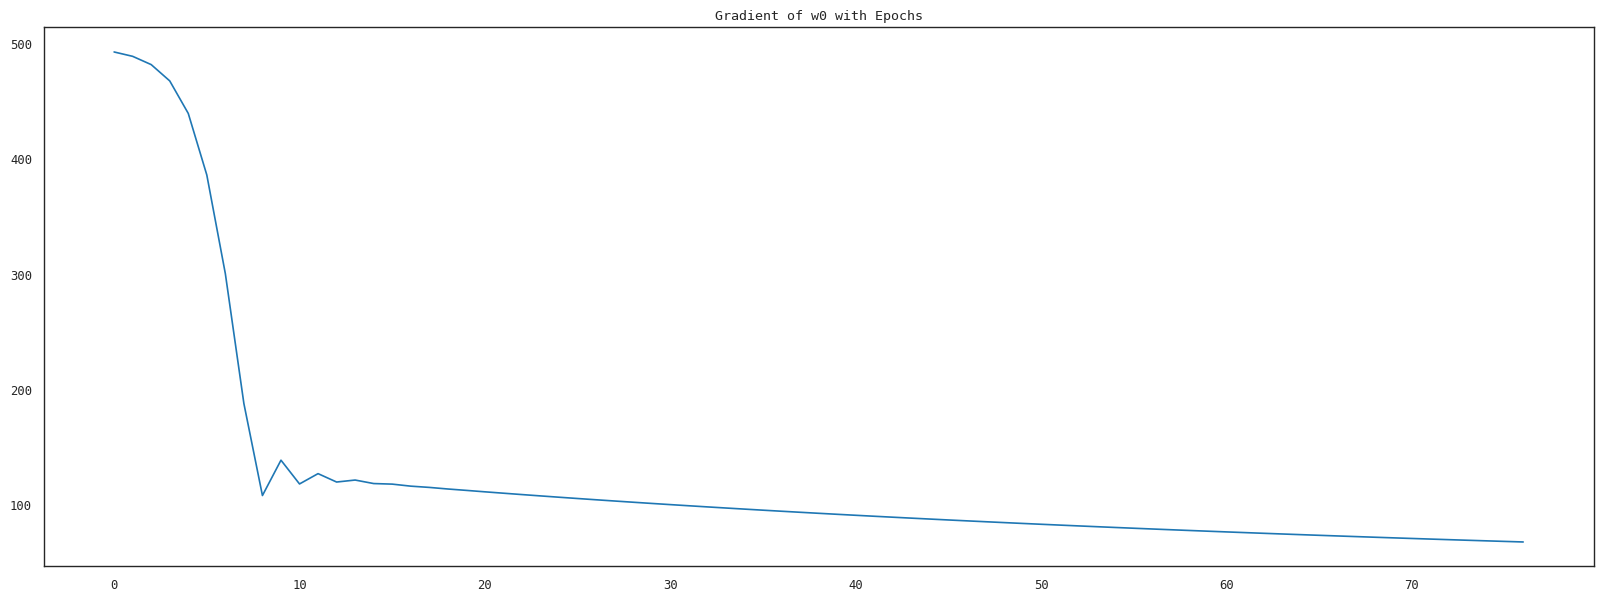

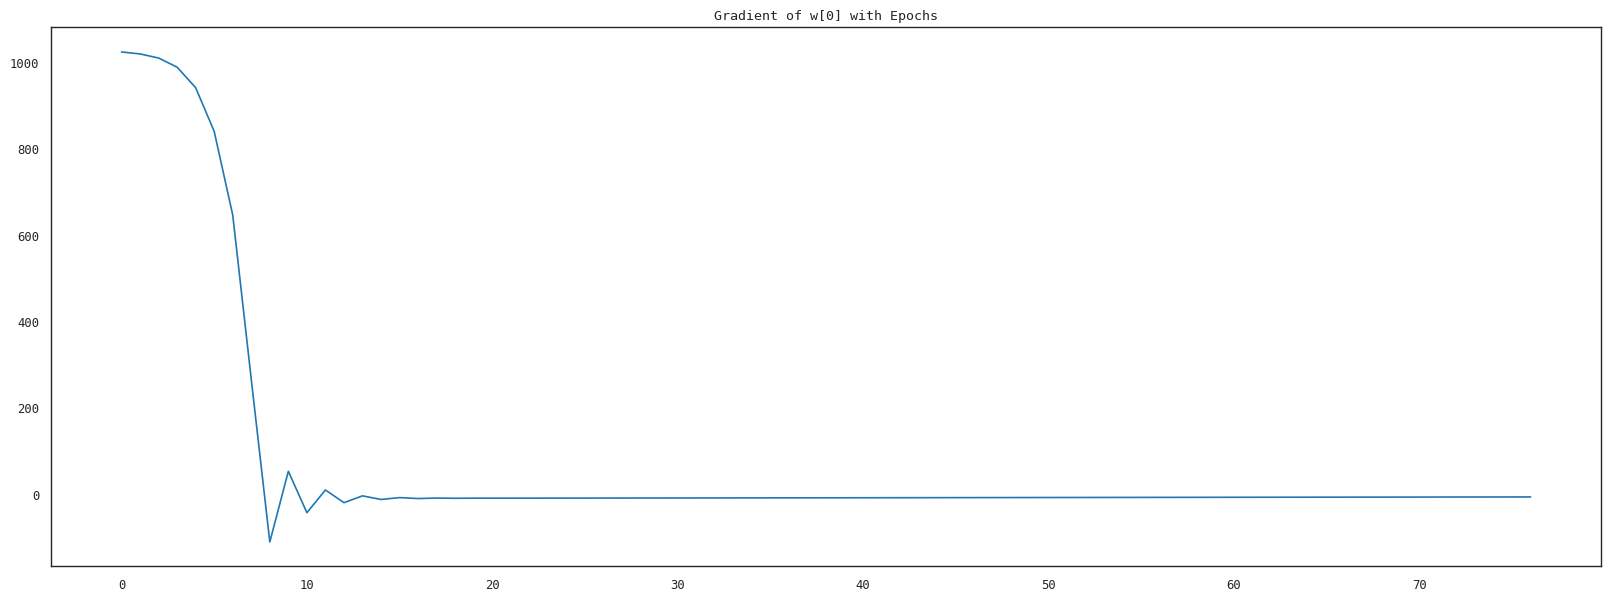

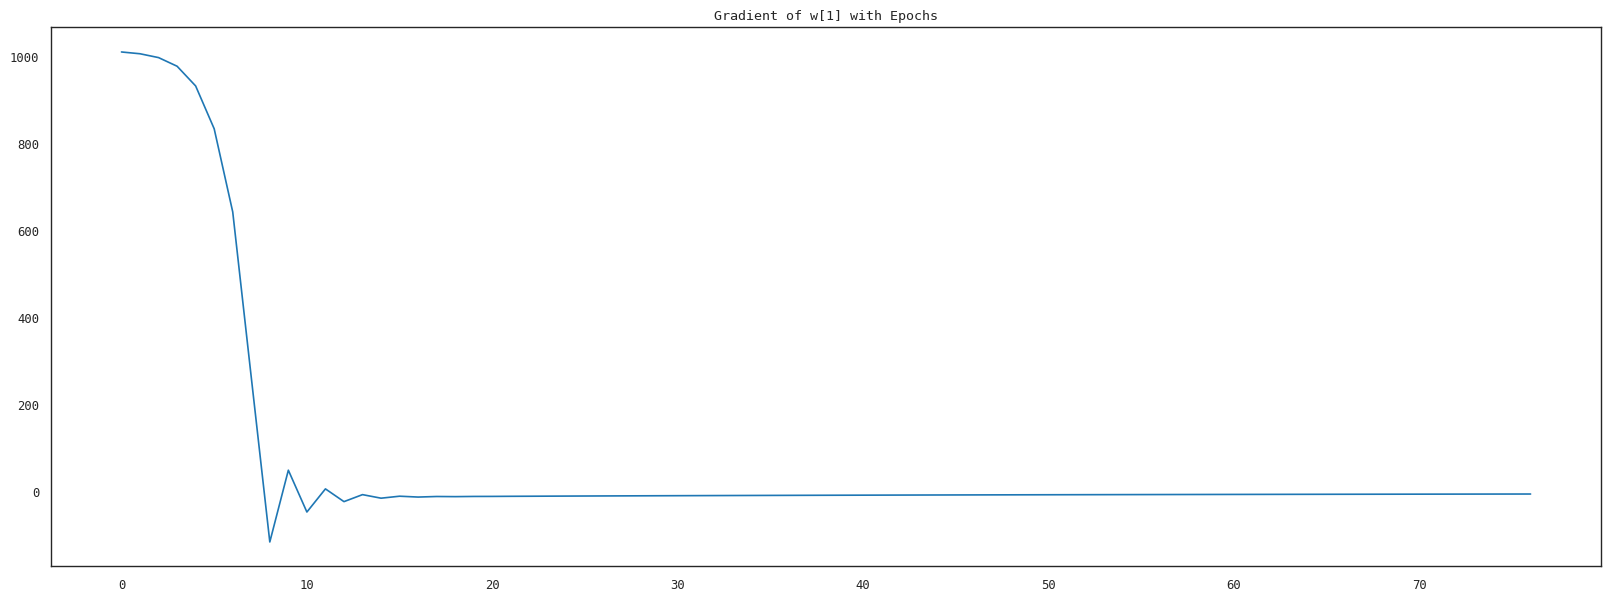

In [3]:
# forming a dummy dataset for binary classification
X, y = datasets.make_blobs(n_samples=1000, centers=[[2, 2], [7, 7]], n_features=2, center_box=(0, 10), cluster_std=1)

# plot dataset with an initial randomly guessed weights
w, w0  = np.random.normal(size=(2,)), np.random.normal()
print(f"w: {w}\tw0: {w0}")
plot_dataset_and_classifier(X, y, w, w0)

# implement logistic regression to get optimal weights for a perfect classifier
w, w0, y_hat, accuracy_history, loss_history, grad_w0_history, grad_w1_history, grad_w2_history = logistic_regression(X=X, y=y, w=w, w0=w0, num_epochs=1000, learning_rate=0.5, plateau_counter_limit=100, accuracy_delta=0.1)
print(f"\nw_optimal: {w}\tw0_optimal: {w0}")
plot_dataset_and_classifier(X, y, w, w0)

# plot accuracy and loss - these should plateau with number of epochs
plot_lineplot(np.arange(len(accuracy_history)), accuracy_history, 'Accuracy with Epochs')
plot_lineplot(np.arange(len(loss_history)), loss_history, 'Loss with Epochs')

# plot gradients - these should approach 0 with number of epochs
plot_lineplot(np.arange(len(grad_w0_history)), grad_w0_history, 'Gradient of w0 with Epochs')
plot_lineplot(np.arange(len(grad_w1_history)), grad_w1_history, 'Gradient of w[0] with Epochs')
plot_lineplot(np.arange(len(grad_w2_history)), grad_w2_history, 'Gradient of w[1] with Epochs')